In [166]:
import pandas as pd

# JSON 파일 경로
json_file_path = "C:/SKN_3_MyProject/SKN_03_FINAL/Data/Final/df_with_negatives.json"
# JSON 파일을 데이터프레임으로 읽기
df = pd.read_json(json_file_path, lines=True)

In [167]:
# # target 컬럼의 비율 계산
# target_counts = df['target'].value_counts(normalize=True) * 100

# # 비율 출력
# for target_value, percentage in target_counts.items():
#     print(f"Target: {target_value}, Percentage: {percentage:.2f}%")

In [168]:
# age 값들의 비율과 갯수를 계산
genre_counts = df['genre'].value_counts(normalize=False)  # 갯수
genre_percentages = df['genre'].value_counts(normalize=True) * 100  # 비율

# 갯수와 비율을 데이터로 결합
genre_summary = [
    {'genre': genre, 'count': count, 'percentage': genre_percentages[genre]}
    for genre, count in genre_counts.items()
]

# 길이에 따라 정렬
sorted_genre_summary = sorted(genre_summary, key=lambda x: len(x['genre']))
cnt = 0
# 출력
for entry in sorted_genre_summary:
    cnt +=entry['count']
    print(f"genre: {entry['genre']}, Count: {entry['count']}, Percentage: {entry['percentage']:.2f}%")
print(cnt)

genre: 역사, Count: 2411, Percentage: 23.35%
genre: 가족, Count: 1865, Percentage: 18.06%
genre: 신화, Count: 1425, Percentage: 13.80%
genre: 대학로, Count: 2489, Percentage: 24.11%
genre: 지역|창작, Count: 2135, Percentage: 20.68%
10325


In [160]:
# 이상치 확인을 위한 사분위수를 계산
q1 = df['percentage'].quantile(0.25)  # 1사분위수
q3 = df['percentage'].quantile(0.75)  # 3사분위수
iqr = q3 - q1  # IQR (Interquartile Range)

# 이상치 경계 계산
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 데이터 확인
outliers = df[(df['percentage'] < lower_bound) | (df['percentage'] > upper_bound)]

# 결과 출력
lower_bound, upper_bound, outliers

(-30.310000000000002,
 124.43,
 Empty DataFrame
 Columns: [title, percentage, start_date, end_date, place, cast, editor, runtime, age, ticket_price, performance_status, child, musical_license, time, poster, genre]
 Index: [])

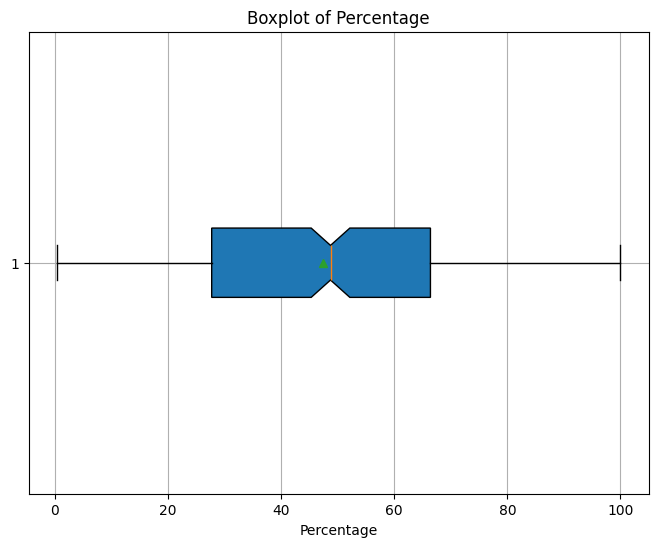

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['percentage'], vert=False, patch_artist=True, notch=True, showmeans=True)
plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.grid(True)
plt.show()

In [162]:
json_file_path = "C:/SKN_3_MyProject/SKN_03_FINAL/Data/Final/df_with_negatives.json"
# JSON 파일을 데이터프레임으로 읽기
df_2 = pd.read_json(json_file_path, lines=True)

In [163]:
print("Target distribution:")
print(df_2['target'].value_counts())
print("Unique target values:", df_2['target'].unique())

Target distribution:
target
0    8260
1    2065
Name: count, dtype: int64
Unique target values: [1 0]


In [164]:
# NaN 값이 포함된 컬럼 및 개수 확인
print("NaN count per column:")
print(df_2.isna().sum())

# NaN 값이 포함된 전체 행 확인
nan_rows = df_2[df_2.isna().any(axis=1)]
print("Rows with NaN values:")

NaN count per column:
cast          0
title         0
genre         0
percentage    0
target        0
dtype: int64
Rows with NaN values:


In [165]:
import numpy as np
# inf 값이 포함된 컬럼 및 개수 확인
print("Inf count per column:")
print((df_2 == np.inf).sum())

# -inf 값이 포함된 컬럼 및 개수 확인
print("-Inf count per column:")
print((df_2 == -np.inf).sum())

# inf 또는 -inf 값이 포함된 전체 행 확인
inf_rows = df_2[(df_2 == np.inf).any(axis=1) | (df_2 == -np.inf).any(axis=1)]
print("Rows with Inf or -Inf values:")

Inf count per column:
cast          0
title         0
genre         0
percentage    0
target        0
dtype: int64
-Inf count per column:
cast          0
title         0
genre         0
percentage    0
target        0
dtype: int64
Rows with Inf or -Inf values:
